Imports

In [2]:
import numpy as np
import uncertainties as unc
# import nuclide-data library
# lib directory must be in the 
# same folder of this file
import sys
sys.path.insert(0, './nuclide-data')
from nuclide_data import *
import matplotlib.pyplot as plt
import matplotlib.colors as cl

( ---*obsolete*--- ) Define a function to assign stability based on decay time 

In [3]:
def stability(time):
    # stable
    if(time>1e6): 
        return 'black'
    if(time>1e5):
        return 'blue'
    if(time>1e4):
        return 'green'
    if(time>1e3):
        return 'cyan'
    if(time>1e2):
        return 'orange'
    if(time>1e1):
        return 'yellow'
    else: 
        return 'gainsboro'


Save in a tuple all (N, Z) points

In [4]:
data=[] 
Zmax=119
# loop over Z
for Z in range(0,Zmax):
    iso = isotopes[Z]
    # loop over isotopes for current Z
    for j in range(0,len(iso)):

        # get N from A of current isotope
        A = iso[j]
        N = iso[j] - Z
        
        # get decay time 
        decTime = nuc(Z, A)['half-life']
        # fix "inf" for stable nuclides
        if(nuc(Z,A)['stable']==True):
            decTime=10e26
        # store data
        data.append((N,Z,decTime))
        
#print(data)

Store first entry of all tuples in X. 
Store second entry in Y

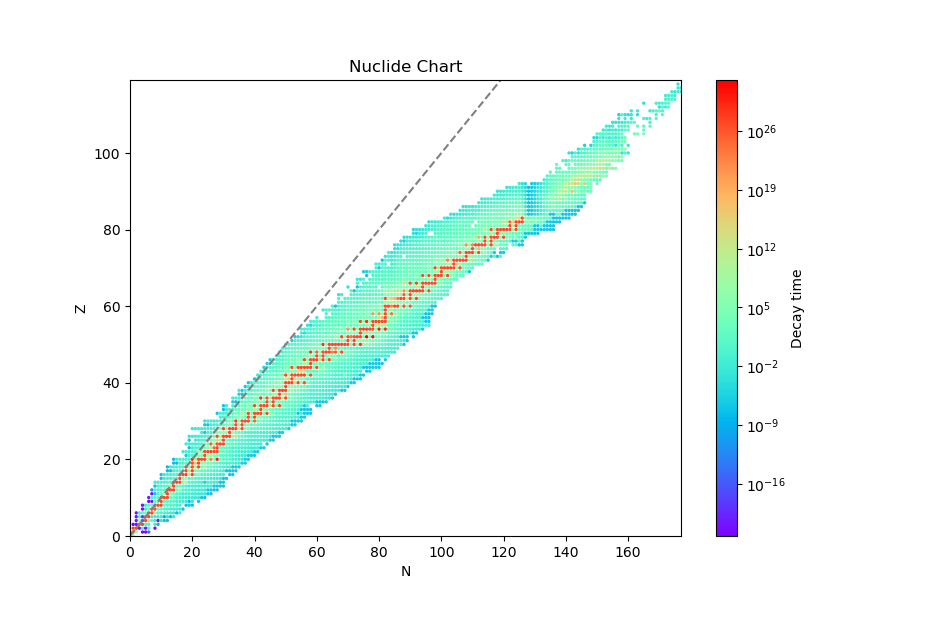

In [18]:
X=[]
Y=[]
Z=[]

for i in range(len(data)):
    # store N as X
    X.append(data[i][0])
    # store Z as Y
    Y.append(data[i][1])
    # store decay time as Z
    Z.append(data[i][2])

# figure and axes
fig = plt.figure(figsize=(16, 10), dpi = 100)
ax = fig.add_subplot(1, 1, 1)

# scatterplot
plot = ax.scatter(X, Y, c=np.array(Z), cmap='rainbow', norm=cl.LogNorm(), s=2)

ax.set_title('Nuclide Chart')
ax.set_xlabel('N')
ax.set_ylabel('Z')

ax.set_xlim(0, np.amax(N))
ax.set_ylim(0, Zmax)

fig.colorbar(plot, label = 'Decay time')

# add X=Y diagonal dashed line
ax.plot(np.linspace(0,Zmax),np.linspace(0,Zmax), '--', color='gray')

plt.show()